# Customer Churn Prediction (Project Plan)

This notebook describes the step-by-step process of predicting **customer churn**. **Code examples** are not provided, but the necessary steps for each stage are explained so that you can implement them yourself in code.

## Table of Contents
1. [Data Loading and Initial Exploration](#step1)
2. [Target Variable Analysis](#step2)
3. [Visual Analysis](#step3)
4. [Main Processing Steps (Data Cleaning/Preprocessing)](#step4)
5. [Preparation for Modeling](#step5)
6. [Model Building and Evaluation](#step6)
7. [Conclusion and Future Work](#step7)


<h2>1. Loading Data and Initial Exploration<h2>

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix






In [124]:
df = pd.read_csv('churn.csv')

In [125]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [126]:
df.shape

(7043, 21)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [128]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [129]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [130]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<h2>2. Target Variable Analysis<h2>

In [131]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [132]:
numRetained = df[df.Churn == 'No'].shape[0]
numChurned = df[df.Churn == 'Yes'].shape[0]
(numRetained / (numRetained + numChurned)) * 100


73.4630129206304

In [133]:
(numChurned / (numRetained + numChurned)) * 100

26.536987079369588

<h2>3. Visual Analysis<h2>

<Axes: xlabel='count', ylabel='Churn'>

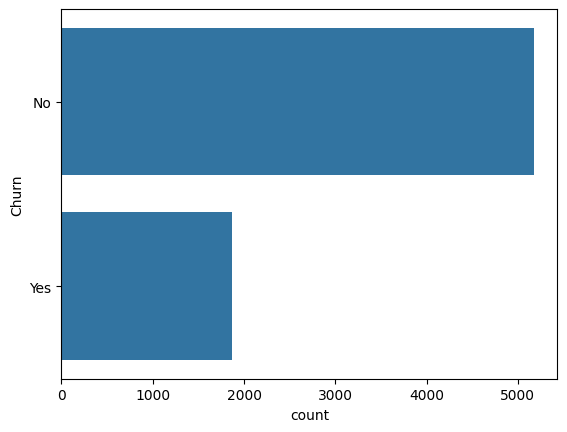

In [134]:
sns.countplot(df['Churn'])

<Axes: xlabel='gender', ylabel='count'>

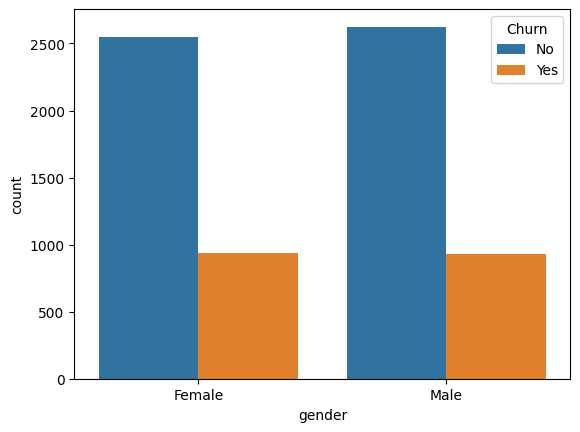

In [135]:
sns.countplot(x='gender', hue='Churn', data=df)

<Axes: xlabel='InternetService', ylabel='count'>

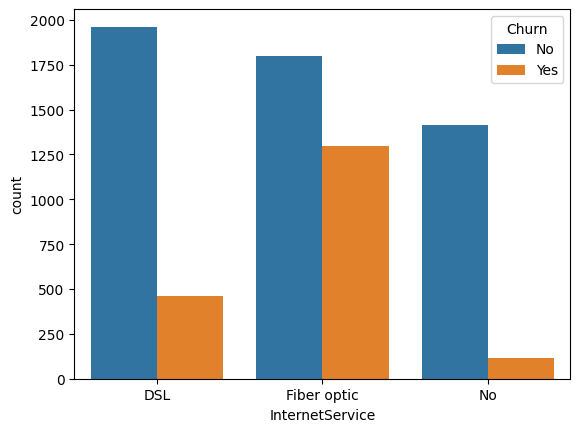

In [136]:
sns.countplot(x='InternetService', hue='Churn', data=df)

Text(0.5, 1.0, 'Distribution of Tenure and Monthly Charges by Churn Status')

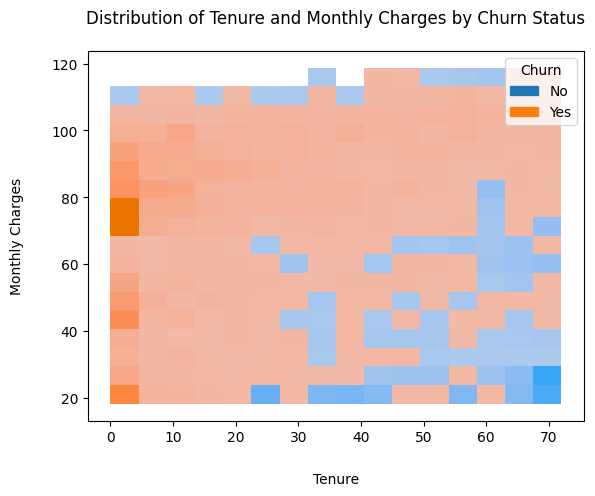

In [137]:
sns.histplot(x = df['tenure'], y = df['MonthlyCharges'], hue=df['Churn'] )

plt.xlabel('Tenure', labelpad=20)
plt.ylabel('Monthly Charges', labelpad=20)

plt.title('Distribution of Tenure and Monthly Charges by Churn Status', pad= 20)

<h2>4. Data Cleaning/Preprocessing <h2>

In [138]:
df.drop('customerID', axis = 1, inplace= True)

In [139]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [140]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [141]:
df['TotalCharges'].isna().sum()

np.int64(11)

In [142]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [144]:
pipe1 = Pipeline(steps= [('imputation',SimpleImputer(strategy="mean")),
                      ("scaling",MinMaxScaler())])

In [145]:
ct = ColumnTransformer(transformers =[('numeric_pipeline', pipe1, make_column_selector(dtype_include=['int64', 'float64'])),
                                      ('cat_ct', OrdinalEncoder (), make_column_selector (dtype_include=['object']))])

In [146]:
transformed_X_train = ct.fit_transform(X_train)

transformed_X_test  = ct.transform(X_test)


X_train_t = pd.DataFrame(transformed_X_train)
X_test_t = pd.DataFrame(transformed_X_test)

<h2>5. Preparation for Modeling <h2>

In [147]:
X_train_t.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
dtype: object

In [148]:
X_train_t.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

In [149]:

oversampler = RandomOverSampler(sampling_strategy={'Yes': 3000}, random_state=42)
X_train, y_train = oversampler.fit_resample(X_train_t, y_train)

In [150]:
y_train.value_counts()

Churn
No     4138
Yes    3000
Name: count, dtype: int64

<h2>6. Model Building and Evaluation<h2>

In [151]:
model = LogisticRegression()


param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': np.logspace(-4, 4, 20, 40),
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],
    'max_iter': [100, 500, 1000]
}


random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, 
                                   scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)


random_search.fit(X_train, y_train)


best_model = random_search.best_estimator_
train_pred = best_model.predict(X_train)


print("Best Parameters:", random_search.best_params_)
print("Test Accuracy:", accuracy_score(y_train, train_pred))
print("\nClassification Report:\n", classification_report(y_train, train_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\thete\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
75 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\thete\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\thete\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\thete\AppData\Local\Programs\Python\Python310\lib\site-packag

Best Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 100, 'C': np.float64(0.08858667904100823)}
Test Accuracy: 0.7597366209022135

Classification Report:
               precision    recall  f1-score   support

          No       0.80      0.78      0.79      4138
         Yes       0.71      0.73      0.72      3000

    accuracy                           0.76      7138
   macro avg       0.75      0.76      0.75      7138
weighted avg       0.76      0.76      0.76      7138



In [152]:
y_pred = best_model.predict(X_test_t)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.7757274662881476

Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.78      0.84      1036
         Yes       0.56      0.76      0.64       373

    accuracy                           0.78      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.78      0.79      1409

